In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [13]:
ddddd=pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/toy_data_c9_0.0_c10_0.0_2022_1_30_23.csv')

(array([1631., 1541., 1381., 1220., 1066.,  939.,  847.,  763.,  669.,
         585.,  549.,  502.,  403.,  372.,  342.,  308.,  281.,  247.,
         212.,  161.,  168.,  163.,  122.,   81.,   87.,   65.,   38.,
          34.,   18.,   11.]),
 array([8.62911562e-05, 5.30619888e-02, 1.06037686e-01, 1.59013384e-01,
        2.11989082e-01, 2.64964779e-01, 3.17940477e-01, 3.70916174e-01,
        4.23891872e-01, 4.76867570e-01, 5.29843267e-01, 5.82818965e-01,
        6.35794663e-01, 6.88770360e-01, 7.41746058e-01, 7.94721755e-01,
        8.47697453e-01, 9.00673151e-01, 9.53648848e-01, 1.00662455e+00,
        1.05960024e+00, 1.11257594e+00, 1.16555164e+00, 1.21852734e+00,
        1.27150303e+00, 1.32447873e+00, 1.37745443e+00, 1.43043013e+00,
        1.48340582e+00, 1.53638152e+00, 1.58935722e+00]),
 <BarContainer object of 30 artists>)

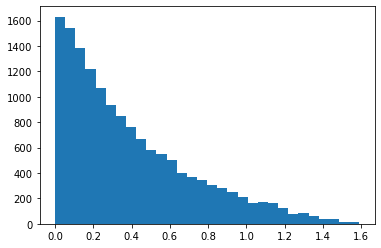

In [14]:
plt.hist(ddddd['BR_rnd'],bins=30)

In [15]:
df = pd.DataFrame({
    'a':np.append(np.random.normal(0,1, 1000),np.random.normal(2,1, 1000)),
    'b':[0] * 1000 + [1] * 1000
})

df = df[(df['a'] > -1) & (df['a'] < 3)]

In [16]:
df

,a,b
0,0.048230,0
1,-0.613959,0
2,-0.012408,0
3,-0.494299,0
4,0.392892,0
...,...,...
1995,2.439434,1
1996,1.177703,1
1997,0.907369,1
1998,1.672339,1


In [17]:
gaussians = {i:np.random.normal(0,1 + 0.1 * i, 1000) for i in range(10)}

In [18]:
data_col = np.concatenate([np.random.normal(0,1 + 0.1 * i, 1000) for i in range(10)])
label_col = np.array([ i for i in range(10) for _ in range(1000)])

gaussians_df = pd.DataFrame({'A':data_col, 'L':label_col})

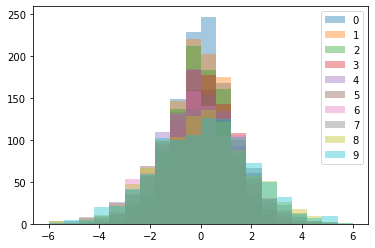

In [19]:
# plt.hist(gaussians.values())
bin_edges = np.linspace(-6,6,21)
for i, arr in gaussians.items():
    plt.hist(arr, alpha=0.4, label=f'{i}', bins=bin_edges)
plt.legend()
# plt.show()

L
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A, dtype: object

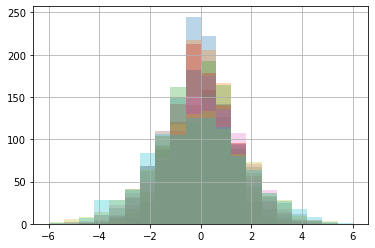

In [21]:
bin_edges = np.linspace(-6,6,21)
gaussians_df.groupby('L')['A'].hist(bins=bin_edges, alpha=0.3)

In [155]:
# nX_train, nX_test, ny_train, ny_test = train_test_split(df[['a']], df['b'], test_size=0.2, shuffle=True)

In [24]:
#  here i need to unfold a cell
scores=[]
log_likelihods = {}
for i in range(10):
    X = gaussians_df[(gaussians_df['L'] == i) | (gaussians_df['L'] == 0)]
    nX_train, nX_test, ny_train, ny_test = train_test_split(X[['A']], X['L'], test_size=0.2, shuffle=True)
    mlp_clf = MLPClassifier()
    mlp_clf.fit(nX_train, ny_train)
    scores.append(mlp_clf.score(nX_test, ny_test))
    print('MLP',mlp_clf.score(nX_test, ny_test))

    new_test = np.random.normal(0, 1 + 0.1 * i, (1000, 1))

    log_probs = mlp_clf.predict_log_proba(new_test)

    log_likelihood = sum(log_probs)

    log_likelihods[i] = log_likelihood

scores


MLP 1.0
MLP 0.5425
MLP 0.585
MLP 0.5525
MLP 0.5525
MLP 0.615
MLP 0.64
MLP 0.645
MLP 0.6325
MLP 0.6475


[1.0, 0.5425, 0.585, 0.5525, 0.5525, 0.615, 0.64, 0.645, 0.6325, 0.6475]

In [265]:
mlp_clf = MLPClassifier()
mlp_clf.fit(nX_train, ny_train)
print('MLP',mlp_clf.score(nX_test, ny_test))

gnb = GaussianNB()

# Train our classifier
model = gnb.fit(nX_train, ny_train)

print('Gnb',gnb.score(nX_test, ny_test))

# Make predictions
preds = gnb.predict(nX_test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(ny_test, preds))

MLP 0.63
Gnb 0.6275
0.6275


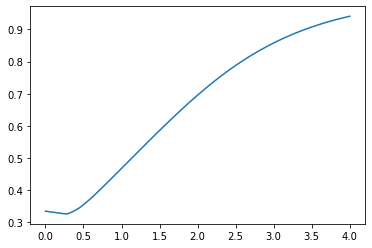

In [266]:
x = np.linspace(0,4,100)
plt.plot(x, mlp_clf.predict_proba(x.reshape(100,1))[:,1])

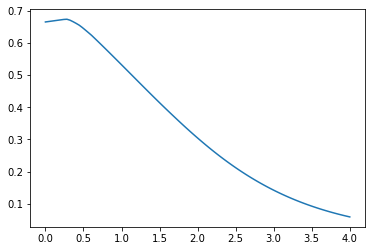

In [267]:
x = np.linspace(0,4,100)
plt.plot(x, mlp_clf.predict_proba(x.reshape(100,1))[:,0])

(array([ 2.,  0.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  4.,  2.,  1.,  4.,
         4.,  7.,  8.,  6.,  9., 12.,  8.,  6., 17., 11., 45., 59.]),
 array([0.0580463 , 0.08267097, 0.10729564, 0.13192031, 0.15654499,
        0.18116966, 0.20579433, 0.23041901, 0.25504368, 0.27966835,
        0.30429303, 0.3289177 , 0.35354237, 0.37816705, 0.40279172,
        0.42741639, 0.45204107, 0.47666574, 0.50129041, 0.52591508,
        0.55053976, 0.57516443, 0.5997891 , 0.62441378, 0.64903845,
        0.67366312]),
 <BarContainer object of 25 artists>)

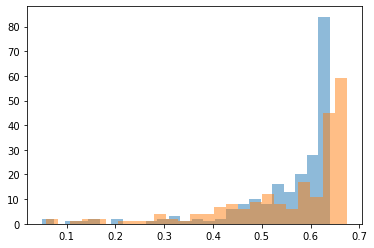

In [268]:
plt.hist(gnb.predict_proba(nX_test[ny_test == 0])[:,0],bins=25, alpha=0.5)
plt.hist(mlp_clf.predict_proba(nX_test[ny_test == 0])[:,0],bins=25, alpha=0.5)